In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
data = pd.read_csv(
    "data/FamaFrenchFactors.csv", 
    parse_dates=["Date"]
)

data.sort_values(by="Date", inplace=True)
data.set_index("Date", inplace=True)

data.columns = [column.lower() for column in data.columns]

data.head(2)

,portfolio,market_excess,smb,hml,rmw,cma,rf
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0


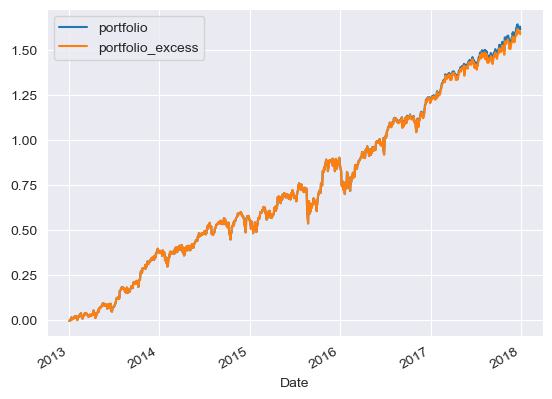

In [7]:
# Calculate excess portfolio returns
data['portfolio_excess'] = data["portfolio"] - data["rf"]

# Plot returns vs excess returns
cumulative_returns = ((1+data[['portfolio','portfolio_excess']]).cumprod()-1)
cumulative_returns.plot()
plt.show();

In [8]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = data[['portfolio_excess', 'market_excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

5.7261263381549656e-05


In [9]:
# Calculate the benchmark variance
benchmark_variance = data['market_excess'].var()
print(benchmark_variance)

5.8803350882118946e-05


In [10]:

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print(portfolio_beta)

0.9737755165745459


In [11]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
capm_model = smf.ols(formula="portfolio_excess ~ market_excess", data=data)


In [12]:
# Print adjusted r-squared of the fitted regression
capm_fit = capm_model.fit()
print(capm_fit.rsquared_adj)

# Extract the beta
regression_beta = capm_fit.params["market_excess"]
print(regression_beta)

0.7942627160017839
0.9737755165745459


# Alpha and multi-factor models


In [13]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
fama_french_model = smf.ols(
    formula='portfolio_excess ~ market_excess + smb + hml', 
    data=data
)


In [14]:
# Fit the regression
fama_french_fit = fama_french_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = fama_french_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585152


In [16]:
# Extract the p-value of the SMB factor
smb_pval = fama_french_fit.pvalues["smb"]

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'


In [17]:
# Print the SMB coefficient
smb_coeff = fama_french_fit.params["smb"]
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.2621515274319265  and is  significant


In [18]:
# Calculate your portfolio alpha
portfolio_alpha = fama_french_fit.params["Intercept"]
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((portfolio_alpha + 1) ** 252) - 1
print(portfolio_alpha_annualized)

0.00018326665203182986
0.04726181730280854


# 5 Factor

In [19]:

# Define the regression formula
fama_french5_model = smf.ols(
    formula='portfolio_excess ~ market_excess + smb + hml + rmw + cma', 
    data=data
)

# Fit the regression
fama_french5_fit = fama_french5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = fama_french5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225793
